# Large Language Models are Zero-Shot Reasoners


## Abstract:
### 前景：
* CoT prompting 实现的 multi-step reasoning through step-by-step answer examples(即：多步推理，实现逐步回答问题) 取得了好的结果

### 本文主要工作：
* 通过在每个答案前添加 "Let's think step by step" ，本文的 Zero-Shot-CoT 比普通的 zero-shot LLM 在多个推理任务中取得了更好的成绩

### 本文意义：
* 本文希望通过 Zero-Shot CoT ，使大模型获得高层次、多任务的广泛认知能力
  
* 模型展示出的 prompt 在多个推理任务中的多功能性（versatility），表现出了尚未被充分学习的大语言模型的 zero-shot 能力

* 本文期望未来的 multi-task prompts 可以有广泛的认知能力，而不是针对狭隘的任务特定技能

</br>
</br>

## 研究背景：
* 大预言模型LLM的成功离不开 few-shot 或 zero-shot learning，这类模型可以通过简单的 conditioning（提供前置条件）来解决多种问题：
  * few-shot：conditioning the model on a few examples: 提供参考案例
  
  * zero-shot：conditioning the model on instructions that describing the task: 提供解释该任务的语句
  
  **prompting 即为 conditioning the language model**

### 大模型：
语言模型(LM)是一种用于估计文本概率分布的模型。通过大规模模型和大量数据，大型语言模型(llm)能够非常熟练地完成许多下游NLP任务。通过上下文学习的方式，LLM 可以使用称为提示的 text 或 template 来有力地引导输出答案地生成

### CoT：
复杂逻辑问题无法通过 scale law 解决，CoT提出了简单有效地解决方式：通过将答案修改为逐步答案，有效地取得更佳表现   
（具体可见 Chain of Thought 论文笔记）

</br>
</br>


## Zero-Shot—CoT：
#### 图示
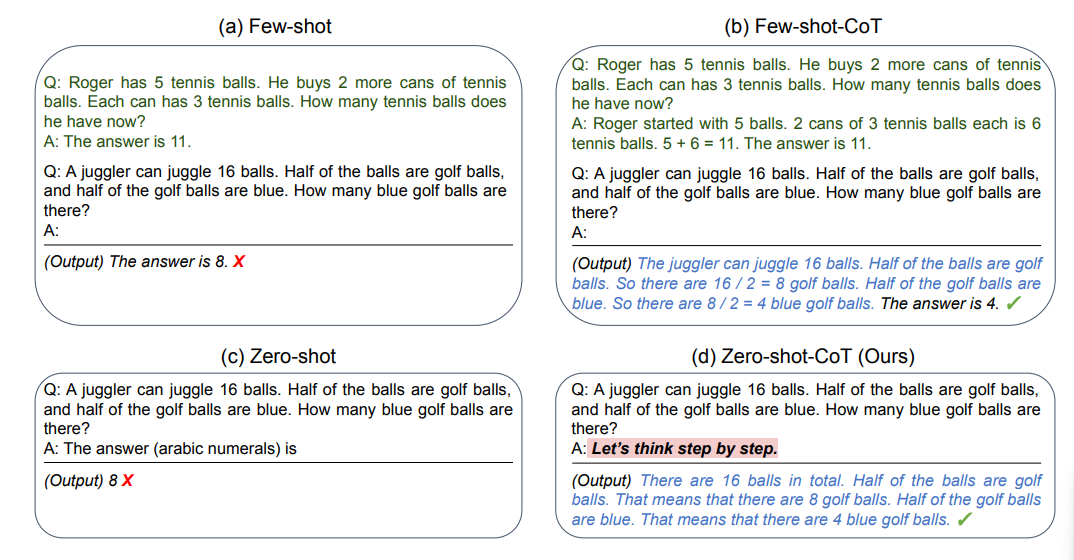  

***

### few-shot CoT（基础）：
**通过生成推理路线将复杂的推理简化成多个简单的步骤**，CoT 能够更好的体现 scale law，使语言模型的表现随模型规模的增大而显著提高

***

### Zero-Shot CoT 特点：
##### Versatile and Task-Agnostic：通用性 与 任务不可知性
* 可以在不修改每个任务的 prompt 的情况下，促进多种推理任务答案的逐步生成
  
* 任务种类：
  * arithmetic：算数
  
  * symbolic reasoning：符号推理
  
  * commonsence reasoning：尝试推理
  
  * 测率QA
  
##### 不受example与测试相似度影响
* Few-Shot CoT 除了需要 人工设计多步骤推理提示（human engineering of multi-step reasoning prompts）外，如果提示示例问题类型和任务问题类型不匹配，它的性能会下降，这说明 few-shot 对每个任务 prompt 的设计具有高敏感性  
*（即：prompt需要高度符合任务，否则性能下降，这可能导致花费更高）*    

* Zero-Shot CoT 则没有上述问题，而且展现出了广泛的认知能力





## Zero-shot Chain of Thought 详解：
### 改进：
* 较原CoT：无需 step-by-step few-shot examples

* 较其它前置 template 的模型：本质上是任务不可知的，且能够引出多步推理

*** 

### Two-Stage prompting：
* **模型使用两次提示来提取推理和答案**

* 图示：   
  
  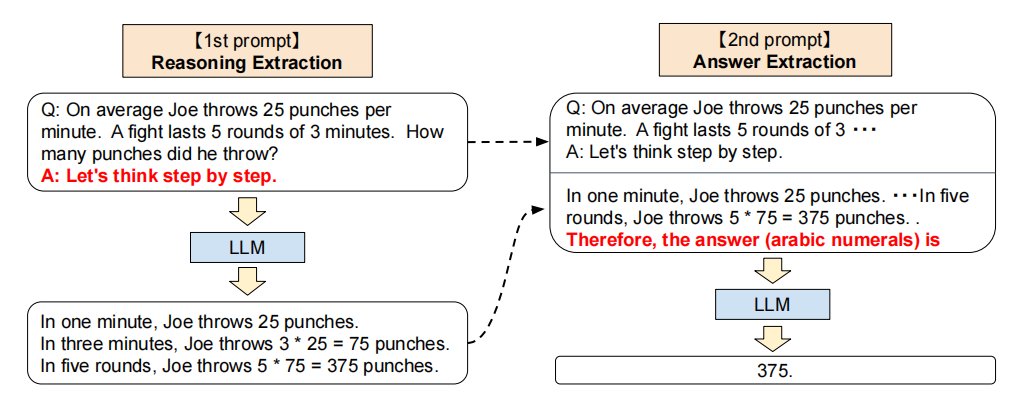  

### 第一步：生成推理
* 在输入的问题后增加 trigger sentence，形成  “Q: [X]. A: [T]” 格式的 template X'（trigger sentence 即为：let’s think step by step）

* 生成推理语句 Z

### 第二步：生成答案
* 使用第一步生成的推理Z ，结合问题，形成 “[X0] [Z] [A]” 格式的输入
  
* 此时的 trigger sentence（A）是 answer trigger，论文中提到：该部分的作用是以正确的格式提取答案，而在 Few-shot prompting 中并没有该部分，因为Few-shot提供的例子已经包括明确的提取答案方式

</br>
</br>

## 实验:
### 与其它 baselines 的对照：
* 虽然在周密制作和任务特定（carefully-crafted and task-specific）的逐步任务中表现不如 Few-shot CoT，但较普通zero-shot有了巨大提高

    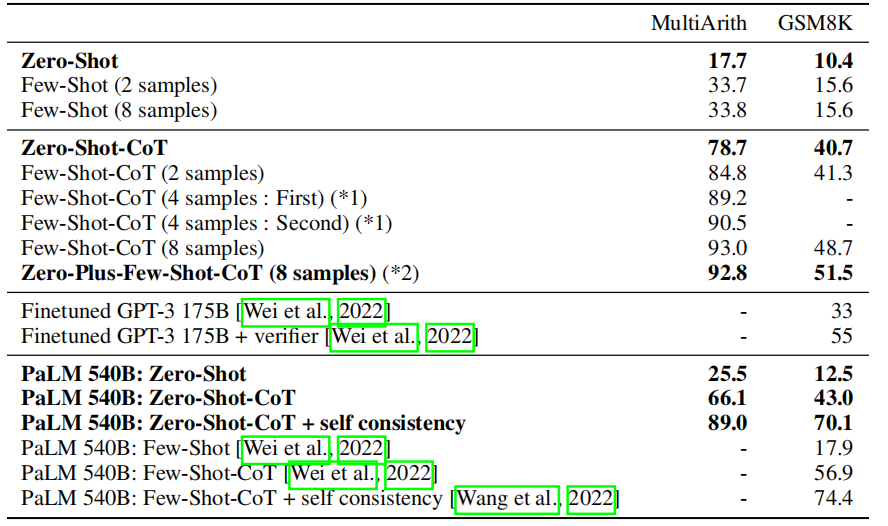

* 在模型规模变大时，CoT的优势更加显著：   
  
    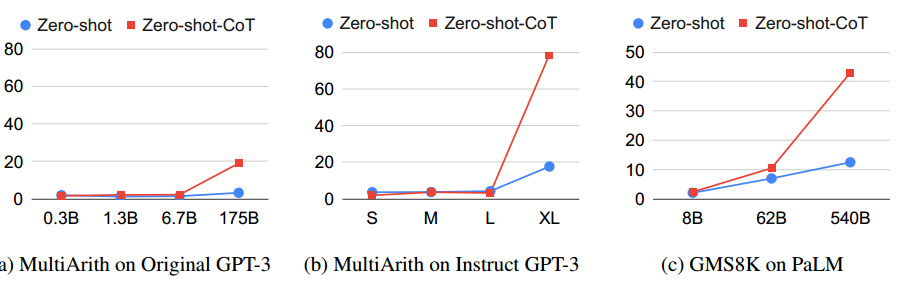

    在没有思维链推理的情况下，随着模型规模的增加，性能不会增加或增长缓慢，即曲线基本是平坦的。相比之下，对于Original/ directive GPT-3和PaLM，随着模型尺寸的增大，使用思维链推理的性能会大幅提高。当模型尺寸较小时，思维链推理效果不佳。   

* 错误分析：
    1. 在常识性推理(CommonsenseQA)中，即使最终预测不正确，Zero-shot-CoT通常也会产生灵活而合理的思维链。当模型发现很难将其缩小到一个答案时，Zero-shot-CoT通常会输出多个答案选择；

    2. 算数问题上：Zero-shot-CoT和Few-shot-CoT在误差模式上存在显著差异。首先，Zero-shot-CoT容易在得到正确的预测后输出不必要的推理步骤，从而导致预测变为错误的预测。Zero-shot-CoT有时也不会开始推理，只是重新表述输入问题。相反，当生成的思维链包括三元运算，例如(3 + 2)* 4时，Few-shot-CoT往往会失败。

### 关于 Trigger Sentence：
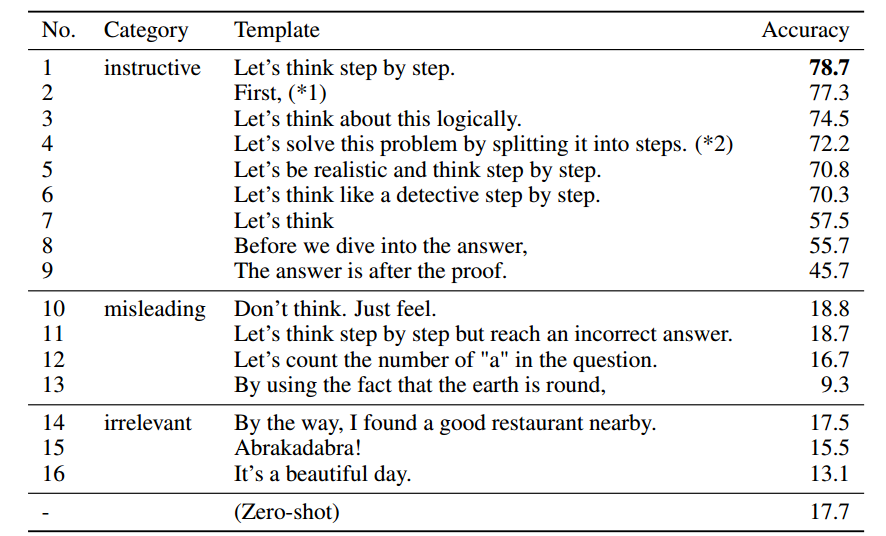   
* 该表总结了使用16种不同模板的性能，其中包含三个类别。分类包括指导性(鼓励推理)、误导性(不鼓励推理或鼓励推理，但方式错误)和无关性(与推理无关)
  
* 如果文本以一种鼓励思维链推理的方式书写，即模板属于“启发性”类别，则表现会得到改善。然而，根据句子的不同，准确性的差异是显著的。不同的模板鼓励模型以完全不同的方式表达推理
  
* 当我们使用误导性或不相关的模板时，性能并没有提高
  
* 如何自动为Zero-shot-CoT创建更好的模板仍然是一个悬而未决的问题
